In [2]:
from Poisson import PoissonModel
from allocation import allocator
from hist_retrieval import hist_retriever
from allocation import allocator
from clustering import clusterer
from itertools import chain
import cPickle as pickle
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# Create a Dataframe and drop extra column
df = pd.read_csv('../data/seattle_911_prepped_no_out.csv', low_memory=False)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# Load pickled Poisson model
with open('PoissonModel.pkl', 'rb') as pkl_object:
    model = pickle.load(pkl_object)   

In [60]:
query = {'date_input': '2016-11-20', 'num_units': 25, 
         'home_game': 'mariners', 'time_range': 0}

In [6]:
preds = model.predict(query)
preds

[('zone1', 19.891596558581856),
 ('zone2', 15.936396294212594),
 ('zone3', 10.652179405931186),
 ('zone4', 18.836224645033205),
 ('zone5', 25.086499480366143),
 ('zone6', 13.005102026133301),
 ('zone7', 18.089585083061046)]

In [7]:
alloc = allocator(query["num_units"], preds)
alloc

{'zone1': 1,
 'zone2': 0,
 'zone3': 0,
 'zone4': 1,
 'zone5': 1,
 'zone6': 0,
 'zone7': 1}

In [63]:
# Homegames
mariners, seahawks, sounders = 0,0,0
if query['home_game'] == 'mariners':
    mariners = 1
if query['home_game'] == 'seahawks':
    seahawks = 1
if query['home_game'] == 'sounders':
    sounders = 1

    
df1 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone1')
df2 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone2')
df3 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone3')
df4 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone4')
df5 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone5')
df6 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone6')
df7 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone7')

In [64]:
# Find centroids with clusterer
centroids1, clusters1 = clusterer(df1, int(alloc['zone1']))
centroids2, clusters2 = clusterer(df2, int(alloc['zone2']))
centroids3, clusters3 = clusterer(df3, int(alloc['zone3']))
centroids4, clusters4 = clusterer(df4, int(alloc['zone4']))
centroids5, clusters5 = clusterer(df5, int(alloc['zone5']))
centroids6, clusters6 = clusterer(df6, int(alloc['zone6']))
centroids7, clusters7 = clusterer(df7, int(alloc['zone7']))

In [65]:
# Combine centroids and create DataFrame of locations
centroids = list(chain(centroids1, centroids2, centroids3, centroids4,
                       centroids5, centroids6, centroids7))
centroid_df = pd.DataFrame(centroids)
centroid_df.columns = ['Latitude', 'Longitude']

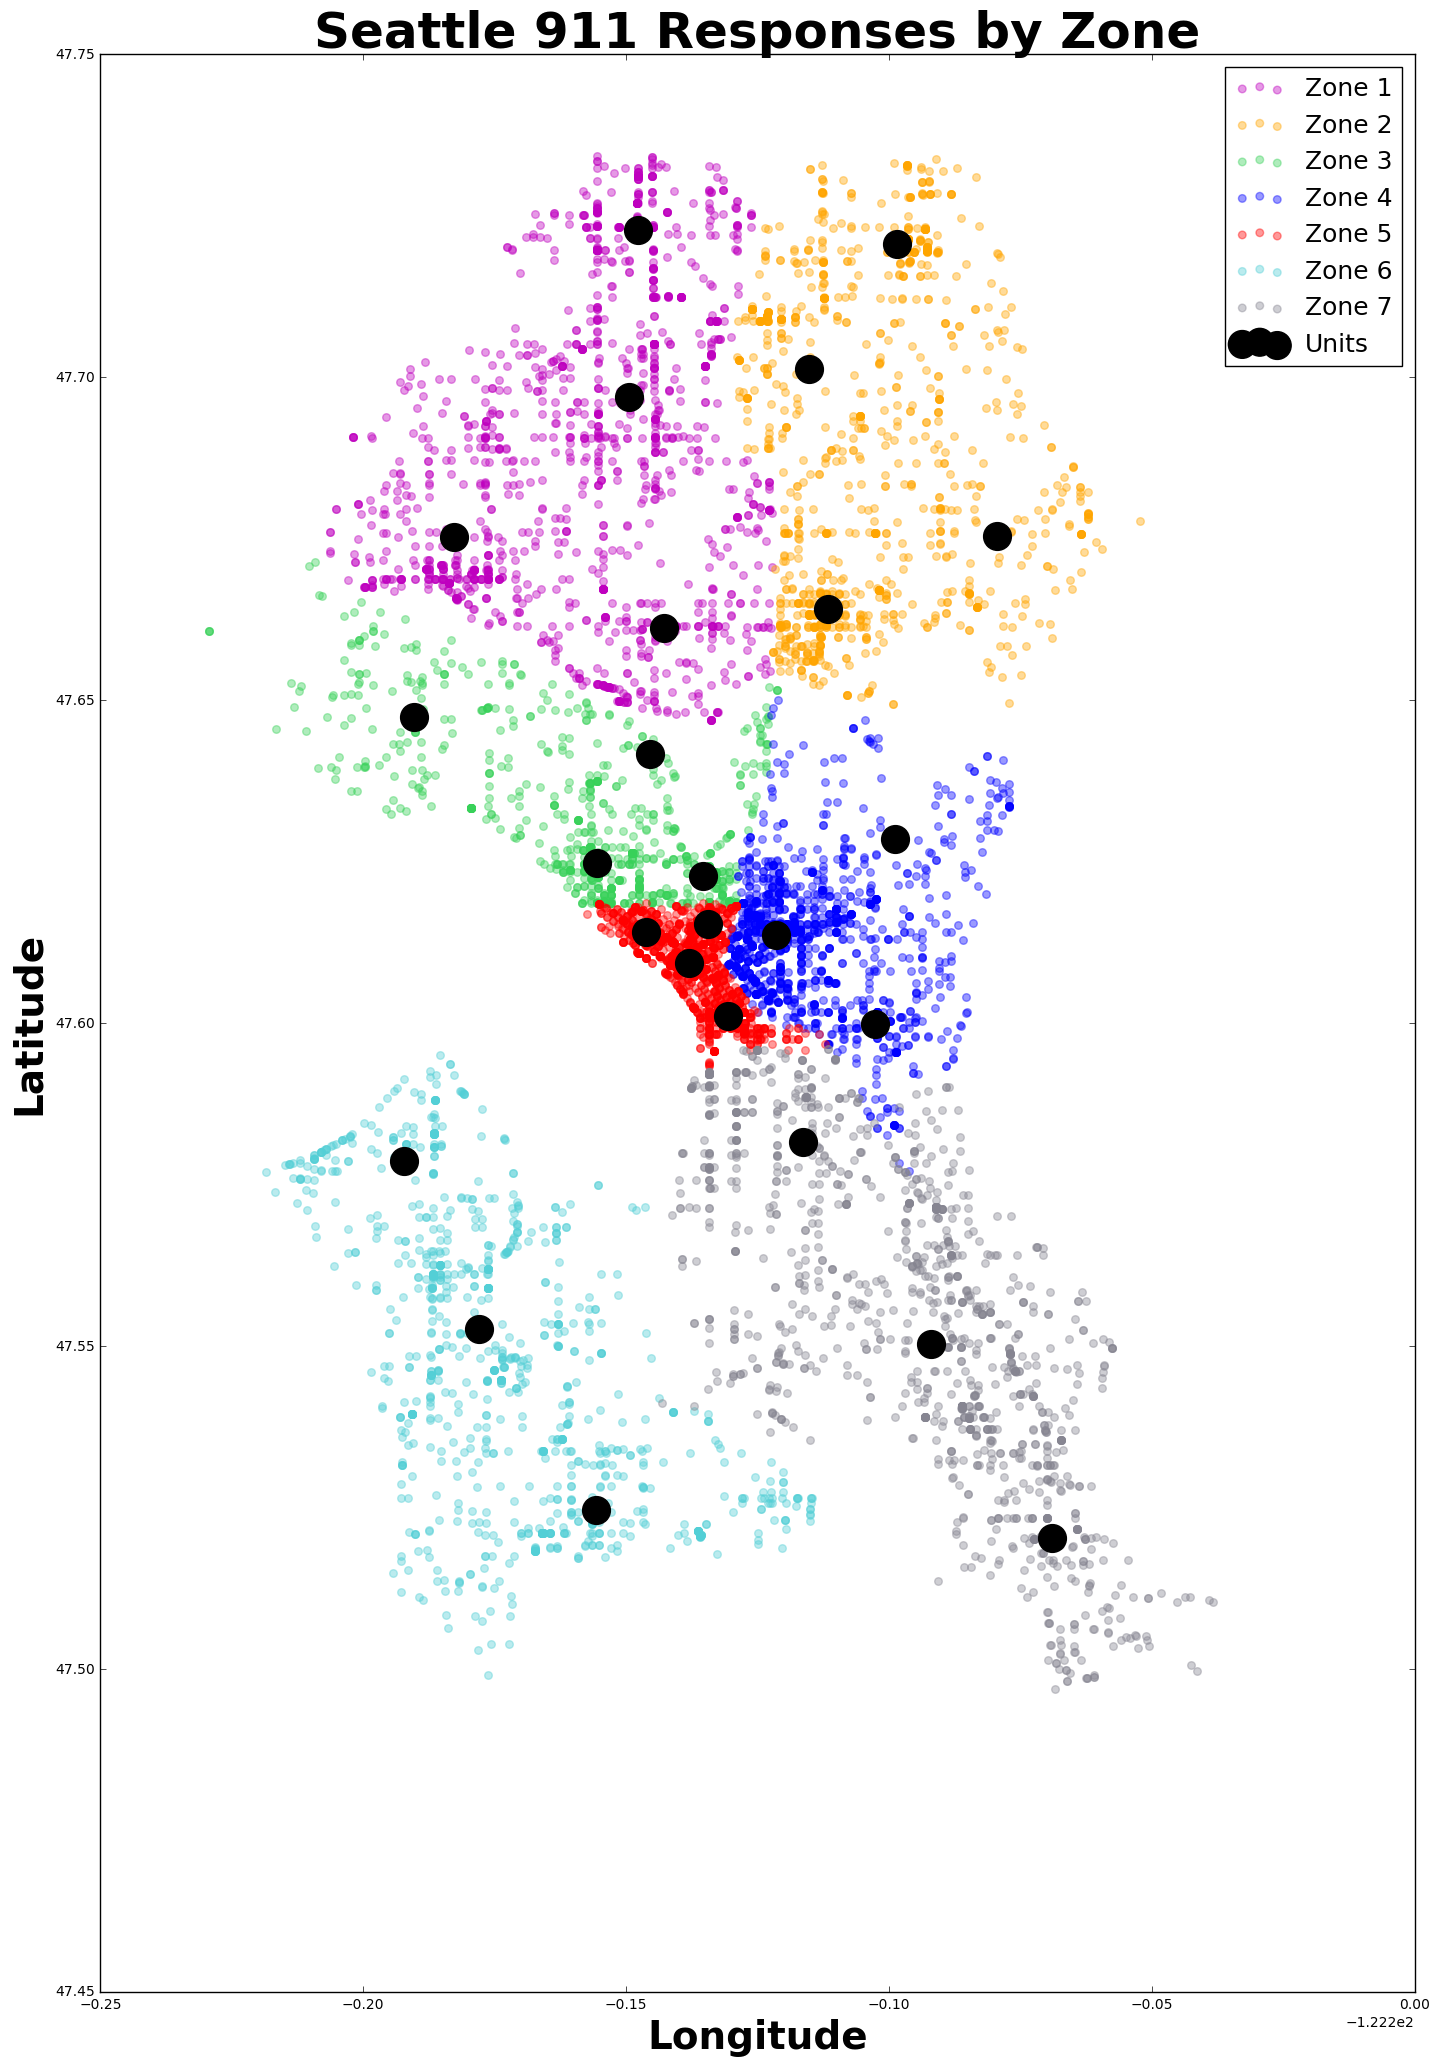

In [67]:
# Create and save a scatter plot (map) of 911 calls by zone
plt.figure(figsize=(16.96,25))
plt.scatter(x=df1.Longitude, y=df1.Latitude, color='m', s=30, alpha=0.4)
plt.scatter(x=df2.Longitude, y=df2.Latitude, color='orange', s=30, alpha=0.4)
plt.scatter(x=df3.Longitude, y=df3.Latitude, color='#38d159', s=30, alpha=0.4)
plt.scatter(x=df4.Longitude, y=df4.Latitude, color='b', s=30, alpha=0.4)
plt.scatter(x=df5.Longitude, y=df5.Latitude, color='r', s=30, alpha=0.4)
plt.scatter(x=df6.Longitude, y=df6.Latitude, color='#53cfd6', s=30, alpha=0.4)
plt.scatter(x=df7.Longitude, y=df7.Latitude, color='#868591', s=30, alpha=0.4)
plt.scatter(centroid_df.Longitude, centroid_df.Latitude, s=400, color='k')
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Responses by Zone', fontsize=36, fontweight='bold')
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5', 'Zone 6', 'Zone 7', 'Units'], fontsize=18)
plt.savefig('../app/static/seattle_911_pred_live.png')

In [4]:
# Testing time to run
teams = ['no_game'] #, 'mariners', 'sounders', 'seahawks']
test_dict = {}
for team in teams:
    for time in xrange(0,1):
        query = {'date_input': '2016-11-20', 'num_units': 1, 
                 'home_game': team, 'time_range': time}
        preds = model.predict(query)
        for unit in xrange(1,5):
            print unit
            query['num_units'] = unit
            alloc = allocator(unit, preds)
            mariners, seahawks, sounders = 0,0,0
            if query['home_game'] == 'mariners':
                mariners = 1
            if query['home_game'] == 'seahawks':
                seahawks = 1
            if query['home_game'] == 'sounders':
                sounders = 1
            df1 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                                     query['time_range'], 'zone1')
            df2 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                                     query['time_range'], 'zone2')
            df3 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                                     query['time_range'], 'zone3')
            df4 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                                     query['time_range'], 'zone4')
            df5 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                                     query['time_range'], 'zone5')
            df6 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                                     query['time_range'], 'zone6')
            df7 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                                     query['time_range'], 'zone7')
            # Find centroids with clusterer
            centroids1, clusters1 = clusterer(df1, int(alloc['zone1']))
            centroids2, clusters2 = clusterer(df2, int(alloc['zone2']))
            centroids3, clusters3 = clusterer(df3, int(alloc['zone3']))
            centroids4, clusters4 = clusterer(df4, int(alloc['zone4']))
            centroids5, clusters5 = clusterer(df5, int(alloc['zone5']))
            centroids6, clusters6 = clusterer(df6, int(alloc['zone6']))
            centroids7, clusters7 = clusterer(df7, int(alloc['zone7']))
            # Combine centroids and create DataFrame of locations
            centroids = list(chain(centroids1, centroids2, centroids3, centroids4,
                                   centroids5, centroids6, centroids7))
            test_dict[str(query)] = centroids
            
            

        

1
2
3
4


In [47]:
test_dict

{"{'time_range': 0, 'home_game': 'no_game', 'num_units': 40, 'date_input': '2016-11-20'}": [(47.699774209764961,
   -122.34553814466534),
  (47.723636799065424, -122.34890497351999),
  (47.657565954070982, -122.34643571189989),
  (47.670332482309107, -122.38139558845451),
  (47.67732756465518, -122.33338256465517),
  (47.692413355300886, -122.37445492550123),
  (47.673278814035093, -122.27803082807023),
  (47.662730161006237, -122.31145411194974),
  (47.722661521472375, -122.29667129038869),
  (47.691106224199281, -122.30258733451957),
  (47.708535409836067, -122.31947467681502),
  (47.621682066137637, -122.35001439153424),
  (47.653065565217382, -122.40074168944096),
  (47.627137926174512, -122.3587567550336),
  (47.639995204545393, -122.34482629545455),
  (47.623297226027468, -122.33407290068482),
  (47.6436484324324, -122.37754864414411),
  (47.620591138195742, -122.31142403454908),
  (47.592714917012458, -122.30079775933599),
  (47.605212419130432, -122.32055818608698),
  (47.60777

In [10]:
centroids = [(47.677581272727238, -122.37939533192382),
             (47.712919741029665, -122.34805637909501),
             (47.664287271540537, -122.34211233420372),
             (47.681384914285708, -122.28977103214292),
             (47.663089380952385, -122.31089547368411),
             (47.714972091304404, -122.30650323260878),
             (47.623308516528915, -122.34742645867757),
             (47.639689687999997, -122.37474428799995),
             (47.652112489999993, -122.39818523999999),
             (47.64042387500001, -122.34223335156256),
             (47.613575095864661, -122.32143335526312),
             (47.599794525735298, -122.3026922132353),
             (47.62844241538459, -122.29922202051286),
             (47.614138608076018, -122.34659261757716),
             (47.601259945355217, -122.3308707909837),
             (47.611751771464697, -122.33686217929268),
             (47.534350779951097, -122.37410144743274),
             (47.570948721804541, -122.38625972431088),
             (47.525884480874325, -122.33938371038252),
             (47.552964609236263, -122.29280141563041),
             (47.521587190163949, -122.26989246557379),
             (47.583197496143995, -122.31985378663238)]

0
1


In [10]:
def get_centroids(df1, df2, df3, df4, df5, df6, df7, alloc):
    # Find centroids with clusterer
    centroids1, clusters1 = clusterer(df1, int(alloc['zone1']))
    centroids2, clusters2 = clusterer(df2, int(alloc['zone2']))
    centroids3, clusters3 = clusterer(df3, int(alloc['zone3']))
    centroids4, clusters4 = clusterer(df4, int(alloc['zone4']))
    centroids5, clusters5 = clusterer(df5, int(alloc['zone5']))
    centroids6, clusters6 = clusterer(df6, int(alloc['zone6']))
    centroids7, clusters7 = clusterer(df7, int(alloc['zone7']))
    # Combine centroids and create DataFrame of locations
    centroids = list(chain(centroids1, centroids2, centroids3, centroids4,
                           centroids5, centroids6, centroids7))
    return centroids

In [11]:
get_centroids(df1, df2, df3, df4, df5, df6, df7, alloc)

[(47.689571939111666, -122.35596749570207),
 (47.612851097034955, -122.31473065464962),
 (47.60817301718135, -122.33650566255109),
 (47.5531970441832, -122.2941040806647)]

In [73]:
query = str({'date_input': '2016-11-20', 'num_units': 25, 
         'home_game': 'mariners', 'time_range': 0})
literal_eval(query)

{'date_input': '2016-11-20',
 'home_game': 'mariners',
 'num_units': 25,
 'time_range': 0}